<a href="https://colab.research.google.com/github/matsunil/hdsi/blob/main/Copy_of_huggingface_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Open AI tools and customization

---

## Part 1 — Hugging Face

---

### What is Hugging Face 🤗?

https://huggingface.co/

* ML/AI open-source Ecosystem
  * hub, tools, and community
* The Hub's open repositories:
  * pre-trained *models* and
  * ML/AI ready *datasets*
  * demo *apps*

  for various **tasks**
* Offers *libraries* for interacting with the Hub

### What are tasks?

**Tasks** describe the “shape” of each model’s API (inputs and outputs).


<p align="center"><img src="https://drive.google.com/uc?export=view&id=1xDAws-cwDVqPWVYkyaValKv896Hf1J88" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: Hugging Face Docs</i></sub></p>

* **image classification**
  * input image -> vector of one score per class -> argmax = class
* **image segmentation**
  * input image -> per-pixel class score -> per-pixel argmax = class masks

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1_LxbwlGyqSPx6laM2LqCLdaLWk_jUkDn" align="center" alt="diagram" width="400"/></p>
<p align="center"><sub><i>Image source: ChatGPT generated</i></sub></p>


### Additional Resources on Hugging Face Tasks

* https://huggingface.co/tasks
* https://huggingface.co/tasks/image-segmentation

---

## Part 2 — HuggingFace Datasets

---

### How to interact with Hugging Face datasets?

https://huggingface.co/datasets

* **Step 1** Filter datasets by task
  * image segmentation
      
      tree cover dataset 4.6k rows https://huggingface.co/datasets/restor/tcd
      
      tree cover sample 237 rows https://huggingface.co/datasets/restor/tcd-nc
* **Step 2** Explore and analize data on the Hub
  * view the dataset card

      > **Extract 1** The dataset contains pairs of images, semantic masks and object segments (instance polygons).
      
      > **Extract 2** Where known, each image is also tagged with its terrestrial biome index [-1, 14].

  * use the dataset viewer

  * run queries in the dataset studio over the data splits

      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zQ4yMoB

      ```
      SELECT biome_name, annotation FROM test WHERE biome = 1 LIMIT 10
      ```
      https://huggingface.co/datasets/restor/tcd-nc/sql-console/zoJd5dv
      ```
      SELECT biome_name, COUNT(*) FROM train GROUP BY biome_name
      ```
  * view the dataset files and understand what `*.parquet` files are

    * Parquet files store tables.
    * Parquet is a **columnar storage format optimized for querying and processing large datasets**.
    * Blazing fast read/write operations
    * Efficient storage

    <p align="center"><img src="https://drive.google.com/uc?export=view&id=1X_SmHa8NGFNsoLlxv8dBLCW3opWsxf28" align="center" alt="diagram" width="400"/></p>

    <p align="center"><sub><i>Splitting parquets into smaller chunks improves robustness of data transfers.</i></sub></p>
    



* **Step 3** Use `datasets` 🤗 library

### How to use the `datasets` library?

In [ ]:
from datasets import load_dataset

In [ ]:
"""
  Load a (small) dataset
"""
dataset = load_dataset("restor/tcd-nc")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
"""
 A DatasetDict contains data splits
"""
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 237
    })
    test: Dataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_rows: 35
    })
})


In [ ]:
print("Splits:", list(dataset.keys()))

Splits: ['train', 'test']


In [ ]:
"""
  HuggingFace datasets library is powered by Arrow
  https://huggingface.co/docs/datasets/main/en/about_arrow
"""
type(dataset['train'])

datasets.arrow_dataset.Dataset

In [ ]:
print("Features:", dataset["train"].features)

Features: {'image_id': Value('int64'), 'image': Image(mode=None, decode=True), 'height': Value('int16'), 'width': Value('int16'), 'annotation': Image(mode=None, decode=True), 'oam_id': Value('string'), 'license': Value('string'), 'biome': Value('int8'), 'crs': Value('string'), 'bounds': List(Value('float32'), length=4), 'validation_fold': Value('int8'), 'biome_name': Value('string'), 'lat': Value('float32'), 'lon': Value('float32'), 'segments': Value('string'), 'meta': Value('string'), 'coco_annotations': Value('string')}


In [ ]:
dataset["train"].shape

(237, 17)

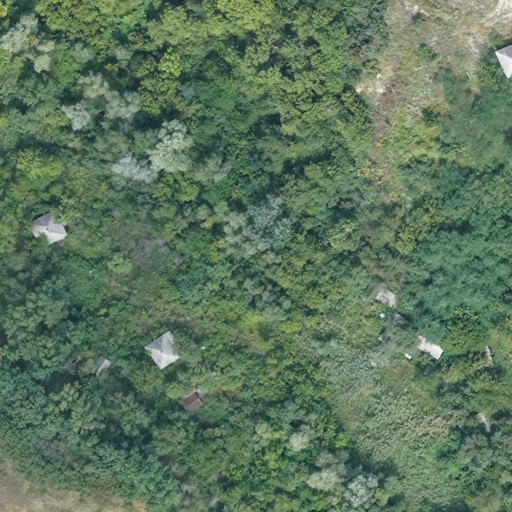

In [ ]:
dataset["train"]["image"][0].resize((512, 512))

### When to use `streaming=True`?

Preview and sample a dataset without downloading it all

In [ ]:
"""
  Stream a (big/large) dataset
"""
iter_dataset = load_dataset("restor/tcd", streaming=True)

In [ ]:
"""
  An IterableDatasetDict contains splits of iterable data
"""
print(iter_dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 7
    })
    test: IterableDataset({
        features: ['image_id', 'image', 'height', 'width', 'annotation', 'oam_id', 'license', 'biome', 'crs', 'bounds', 'validation_fold', 'biome_name', 'lat', 'lon', 'segments', 'meta', 'coco_annotations'],
        num_shards: 1
    })
})


In [ ]:
type(iter_dataset['train'])

datasets.iterable_dataset.IterableDataset

In [ ]:
it = iter(iter_dataset['train'])

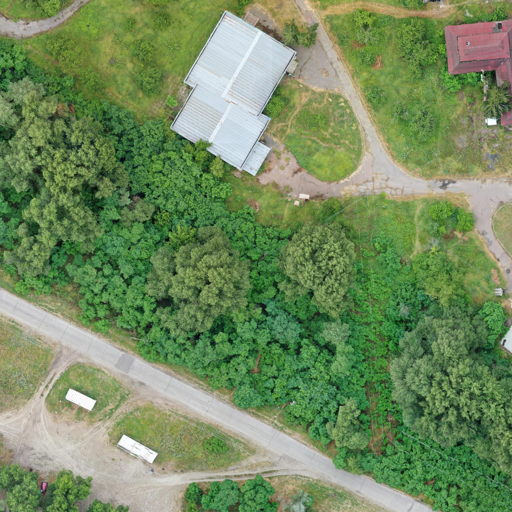

In [ ]:
sample = next(it)
sample["image"].resize((512, 512))

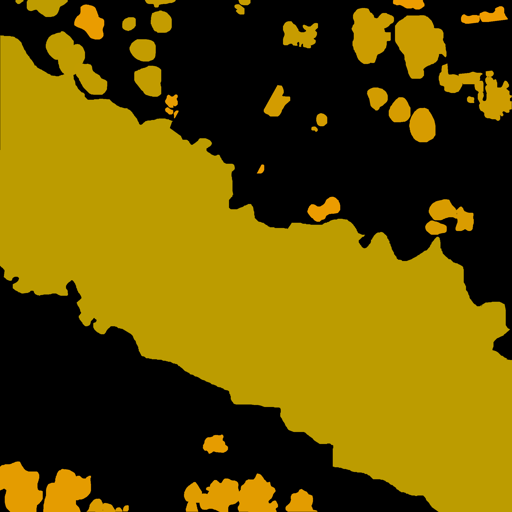

In [ ]:
sample["annotation"].resize((512, 512))

### Additional References on HuggingFace Datasets

* https://huggingface.co/docs/datasets/main/en/index
* https://huggingface.co/docs/dataset-viewer/index
* https://huggingface.co/docs/hub/en/datasets-overview
* parquet files https://huggingface.co/docs/dataset-viewer/parquet




---


### Exercise

1. Browse HuggingFace datasets by task.
2. Choose and explore a dataset in the Hub.
3. Use the `datasets` library to stream and inspect samples of the dataset you chose.
4. Peer discussion - Does HuggingFace datasets Hub follow the **FAIR** principles?

  * **Findable**
  * **Accessible**
  * **Interoperable**
  * **Reusable**

---

## Part 3 — HuggingFace Models

---

### How to interact with Hugging Face models?

* **Step 1** Filter models by task
  * image segmentation
      * ETH Restor tree cover
      
      https://huggingface.co/restor/tcd-segformer-mit-b0
      
      * Nvidia segformer
      
      https://huggingface.co/nvidia/segformer-b0-finetuned-ade-512-512

      https://huggingface.co/models?search=nvidia/segformer

* **Step 2** Explore on the Hub
  * view the `tcd-segformer-mit-b0` model card

      > **Extract 1** The model does not detect individual trees, but provides a per-pixel classification of tree/no-tree.
      
      > **Extract 2** Finetuned from model: SegFormer family

  * view the files and understand what a `*.safetensors` file is

    * **secure** unlike formats that rely on Python's pickle utility (such as .bin or .pt files), it cannot execute arbitrary code during the loading process
    * **efficient** designed to reduce model loading times:
      * Zero-copy access: it allows the application to directly map the file into memory, reducing memory overhead.
      * Lazy loading: It can load only a subset of the tensors
    * **framework and language-agnostic** stores raw numerical data and metadata that describe the model without framework-specific code
    * **compact/portable** it only contains weights and metadata, making it easy to transfer and deploy.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1anlVBTS4ke0kbeieNKCTnRx3iDgNV4Gd" align="center" alt="diagram" width="600"/></p>
<p align="center"><sub><i>Screenshot showing a model weight viewer: 1) Tensors → layer or parameter name (hierarchical), 2) Shape → tensor dimensions (e.g., [256, 64] = 256 output channels, 64 input), 3) Precision → data type (e.g., F32 = 32-bit float, I64 = 64-bit integer). Inside the `decode_head`: 1) `batch_norm` normalization layers, 2) `linear_c` linear projection layers converting encoder feature maps to a unified embedding size, 3) `classifier` final per-pixel classification layer producing class logits. </i></sub></p>

* **Step 3** Use 🤗 model libraries: `transformers`, `difussers`


### How to use the `transformers` library?

In [ ]:
"""
There are two key components in the trasformers library: models and processors
"""
# import model class
from transformers import AutoModelForSemanticSegmentation

# import processor class
from transformers import AutoImageProcessor

segformer_processor = AutoImageProcessor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
segformer_model = AutoModelForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)


In [ ]:
# process inputs
image = sample["image"]
inputs = segformer_processor(images=image, return_tensors="pt")
#inputs

In [ ]:
# predict masks
import torch

with torch.no_grad():
    outputs = segformer_model(**inputs)
#outputs

In [ ]:
# process outputs
outputs = segformer_processor.post_process_semantic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]
masks = outputs.numpy()

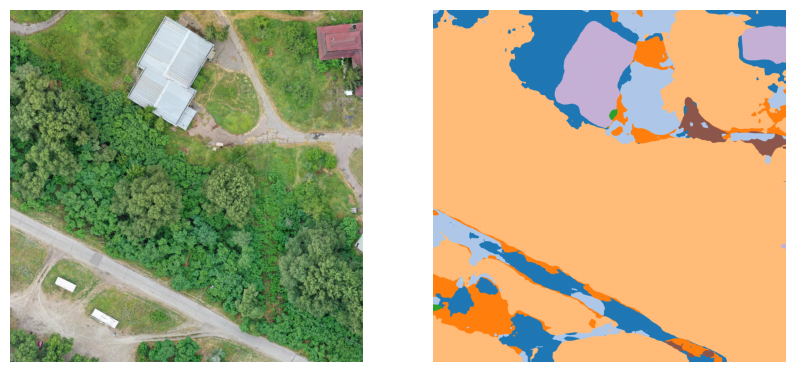

In [ ]:
import matplotlib.pyplot as plt

# Plot input and output
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[0].axis("off")

ax[1].imshow(masks, cmap="tab20")
ax[1].axis("off")

plt.show()

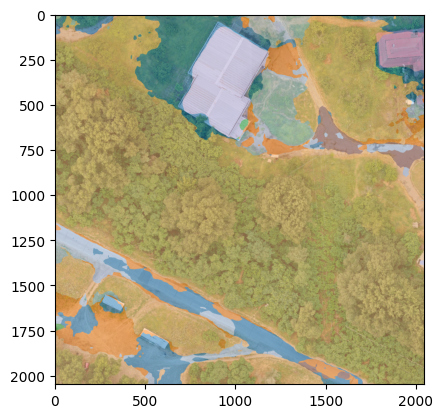

In [ ]:
# overlay
plt.imshow(image)
plt.imshow(masks, alpha=0.5, cmap="tab20")
plt.show()

In [ ]:
# Get unique class IDs in the predicted mask
unique_ids = torch.unique(outputs)

# Map IDs to human-readable labels
labels = [segformer_model.config.id2label[int(i)] for i in unique_ids]

print("Number of classes in segmentation:", len(labels))
print("Classes in segmentation:", labels)

Number of classes in segmentation: 15
Classes in segmentation: ['wall', 'building', 'floor', 'tree', 'road', 'windowpane', 'grass', 'sidewalk', 'earth', 'plant', 'water', 'box', 'signboard', 'path', 'bannister']


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary
summary(segformer_model, input_size=(1, 3, 512, 512))

Layer (type:depth-idx)                                                      Output Shape              Param #
SegformerForSemanticSegmentation                                            [1, 150, 128, 128]        --
├─SegformerModel: 1-1                                                       [1, 32, 128, 128]         --
│    └─SegformerEncoder: 2-1                                                [1, 32, 128, 128]         --
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    │    └─ModuleList: 3-12                                                --                        (recursive)
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    

In [ ]:
restor_tcd_model = AutoModelForSemanticSegmentation.from_pretrained("restor/tcd-segformer-mit-b0")

In [ ]:
summary(restor_tcd_model, input_size=(1, 3, 512, 512))

Layer (type:depth-idx)                                                      Output Shape              Param #
SegformerForSemanticSegmentation                                            [1, 2, 128, 128]          --
├─SegformerModel: 1-1                                                       [1, 32, 128, 128]         --
│    └─SegformerEncoder: 2-1                                                [1, 32, 128, 128]         --
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    │    └─ModuleList: 3-12                                                --                        (recursive)
│    │    └─ModuleList: 3-10                                                --                        (recursive)
│    │    └─ModuleList: 3-11                                                --                        (recursive)
│    

In [ ]:
"""
The pipeline class pipes models and processor together
"""
from transformers import pipeline

In [ ]:
segformer_pipeline = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512")

Device set to use cuda:0


In [ ]:
result = segformer_pipeline(image)
result

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'floor',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'tree',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'windowpane',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'grass',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'earth',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'plant',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'water',
  'ma

In [ ]:
print("Number of classes in segmentation:", len(result))

Number of classes in segmentation: 15


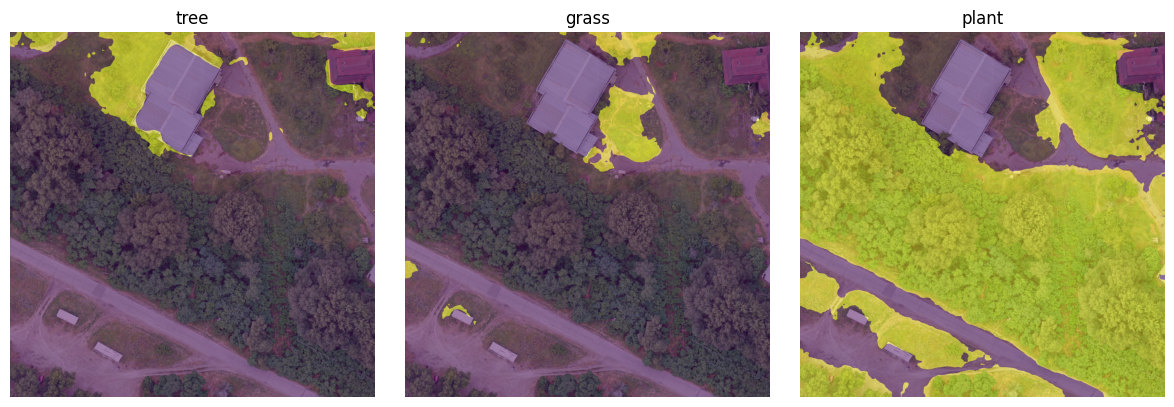

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, idx in enumerate([3, 6, 9]):
    ax[i].imshow(image)
    ax[i].imshow(result[idx]["mask"], alpha = 0.5)
    ax[i].set_title(result[idx]["label"])
    ax[i].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
"""
Remember that the sample was pulled from the fine tuning training dataset,
the resulting mask should be a perfect tree cover segmentation)
"""

restor_tcd_pipeline = pipeline("image-segmentation", model="restor/tcd-segformer-mit-b0")
result = restor_tcd_pipeline(image)
result

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: '_valid_processor_keys'
  image_processor = cls(**image_processor_dict)
Device set to use cuda:0


[{'score': None,
  'label': '__background__',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>},
 {'score': None,
  'label': 'tree',
  'mask': <PIL.Image.Image image mode=L size=2048x2048>}]

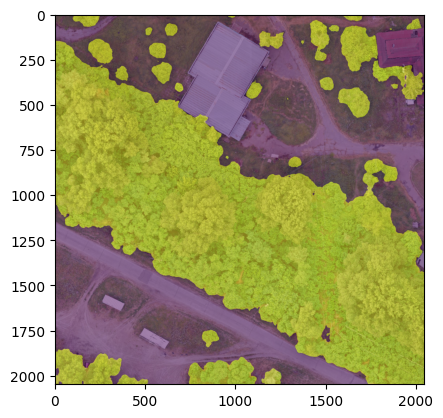

In [ ]:
plt.imshow(image)
plt.imshow(result[1]["mask"], alpha=0.5)
plt.show()

### Additional References on HuggingFace Models

* https://huggingface.co/docs/hub/en/models-the-hub
* https://huggingface.co/docs/transformers/v4.52.1/index
* safetensors https://huggingface.co/docs/safetensors/en/index
* eval restor https://colab.research.google.com/drive/1N_rWko6jzGji3j_ayDR7ngT5lf4P8at_

---
### Exercise

1. Explore the model card for the ETH Restor tree cover model, and answer: For how long and with how many GPUs were each of the models trained? What is the carbon footprint of the training?
2.   Peer discussion:
  *   Are there benefits of fine tuning in terms of GPU time?
  *   How is fine tuning relevant for science?
3. Use the id of an image stored in your Google drive and run the segmenter `SlimSAM-uniform-77`:
    ```
    sam_pipeline("https://drive.google.com/uc?export=view&id=<your_image_id>")
    ```
  * How many masks and which labels do the results have?


## Part 4 — Why is Hugging Face a Community??

**social platform** brings together AI enthusiasts, researchers, and developers to share knowledge, improve models, and work together on projects.

**resource hub** provides tools, demos, documentation, and tutorials to help users learn and experiment with AI models, making it a resource for skill development in the AI field.

**Join HuggingFace 🤗!!**